# Практическоe заданиe 2

### 1. Определить тип данных для каждого из столбцов файла 02_Автоаварии.xls

In [45]:
import pandas as pd

PATH = 'C:/study/practic_analytics/'
data = pd.read_excel(PATH + "02_Автоаварии.xls")
list(data.columns)

['ID',
 'Source',
 'TMC',
 'Severity',
 'Start_Time',
 'End_Time',
 'Distance(mi)',
 'Description',
 'Street',
 'Side',
 'City',
 'State',
 'Zipcode',
 'Weather_Timestamp',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight']

Дискретные количественные данные: TMC, Severity, Weather_Timestamp, Humidity(%), Pressure(in), Visibility(mi)

Номинальные качественные данные: Source, Description, Side, City, State, Wind_Direction, Weather_Condition

Ординальные качественные данные: ID

Качественные данные: Description

Непрерывные количественные данные: Start_Time, End_Time, Distance(mi), Temperature(F), Wind_Chill(F), Wind_Speed(mph), Precipitation(in)

Дихотомические качественные данные: Bump, Crossing, Give_Way, Junction, No_Exit, Railway, Roundabout, Station, Stop, Traffic_Calming, Traffic_Signal, Turning_Loop, Sunrise_Sunset, Civil_Twilight



### 2. Изучить распределение случайных величин – видимость дороги в момент совершения аварии (Visibility) и 1, 2, 3, 4 – видимость дороги в момент совершения аварии степени серьезности 1, 2, 3, 4 (Severity). Выбрать инструмент Python для решения задачи (matplotlib.pyplot.hist(), seaborn.distplot() или seaborn.kdeplot()), построить гистограммы и функции распределения случайных величин

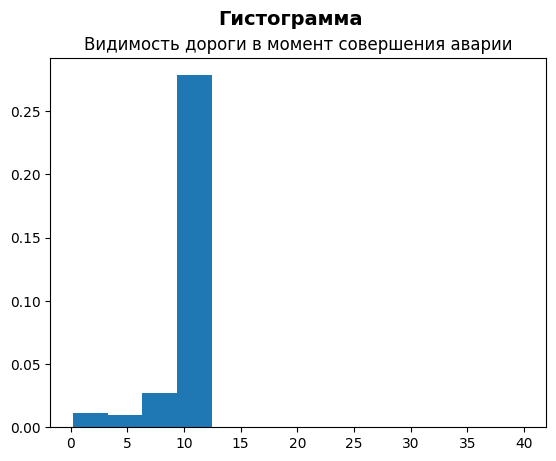

In [46]:
import matplotlib.pyplot as plt
import math

ind = int(math.log(data.shape[0], 2)) + 1
plt.hist(data[["Visibility(mi)"]], bins=ind, density=True)
plt.title("Видимость дороги в момент совершения аварии")
plt.suptitle('Гистограмма', fontsize=14, fontweight='bold')
plt.show()

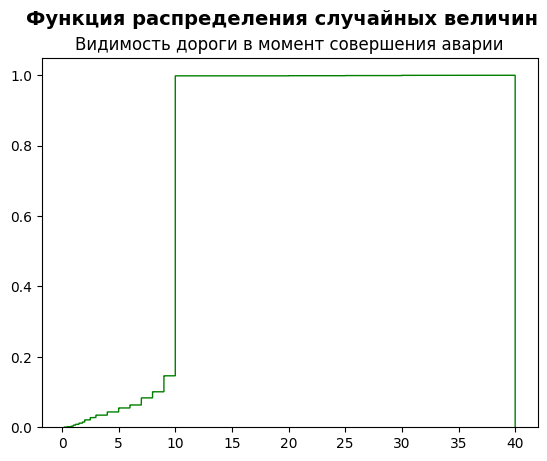

In [47]:
plt.hist(data["Visibility(mi)"], bins=data.shape[0], color='green', cumulative=True, histtype='step', density=True)
plt.title("Видимость дороги в момент совершения аварии")
plt.suptitle('Функция распределения случайных величин', fontsize=14, fontweight='bold')
plt.show()

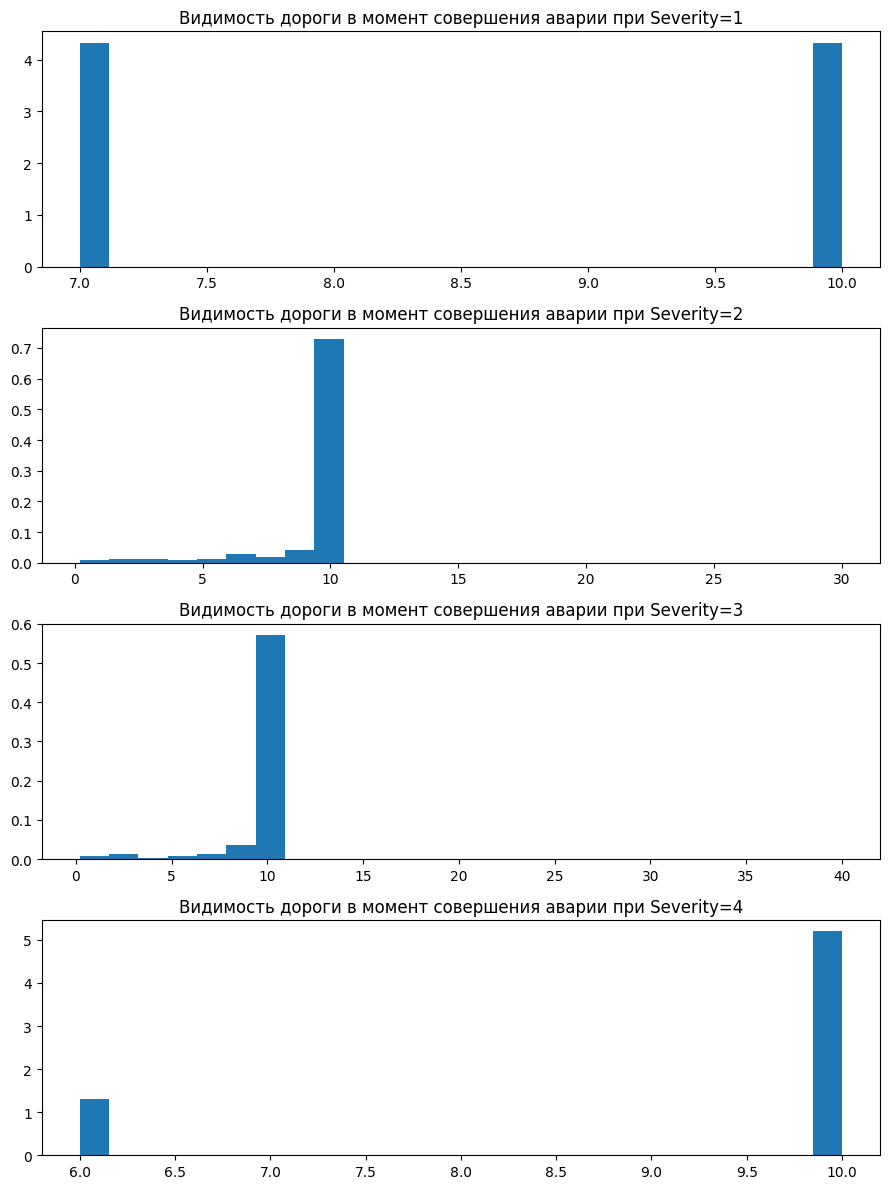

In [48]:
fig, axes = plt.subplots(nrows=4, figsize=(9, 12))
for i in range(4):
 axes[i].hist(data.loc[data["Severity"] == i + 1]["Visibility(mi)"], bins=2*ind, density
=True)
 axes[i].set_title("Видимость дороги в момент совершения аварии при Severity="
 + str(i + 1))
fig.tight_layout()
plt.show()

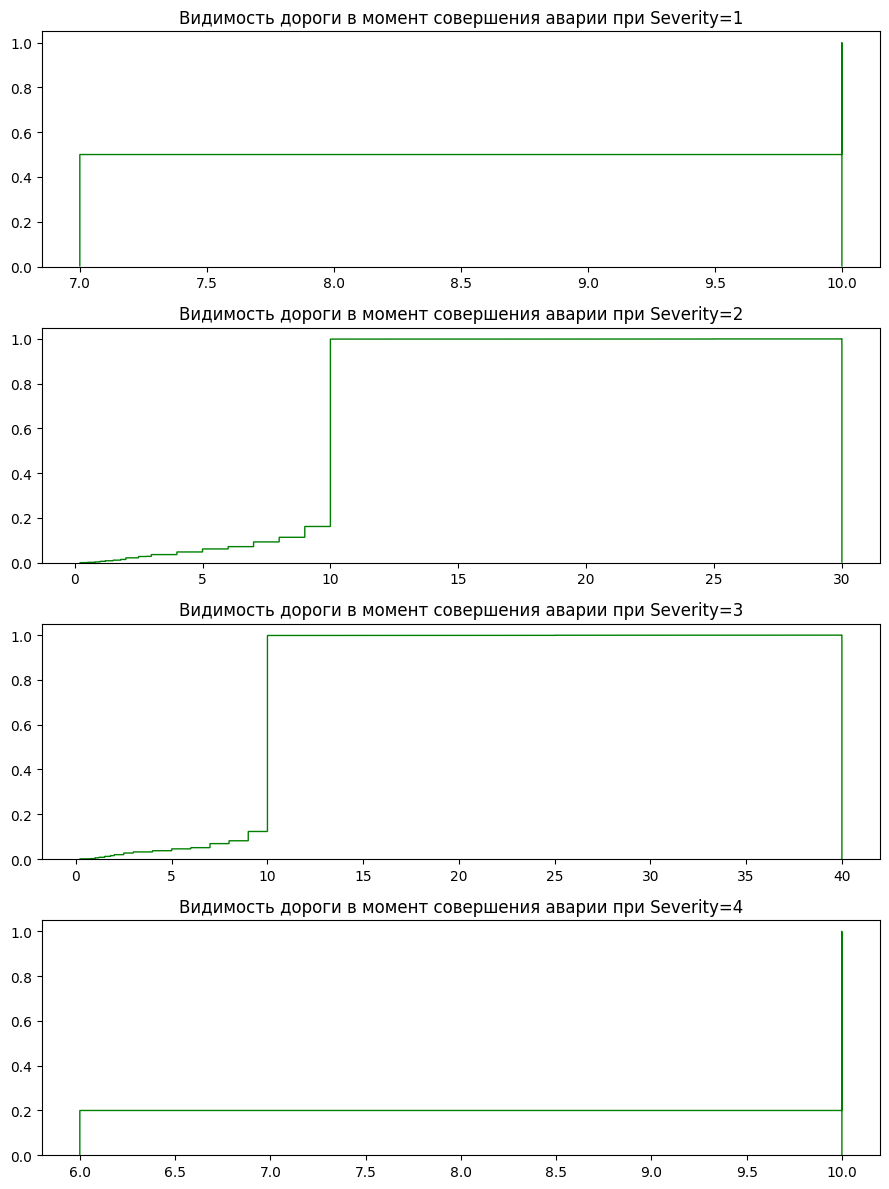

In [49]:
fig, axes = plt.subplots(nrows=4, figsize=(9, 12))
for i in range(4):
 axes[i].hist(data.loc[data["Severity"] == i + 1]["Visibility(mi)"], bins=data.shape[0], color='green',
 cumulative=True, histtype='step', density=True)
 axes[i].set_title("Видимость дороги в момент совершения аварии при Severity="
 + str(i + 1))
fig.tight_layout()
plt.show()

### 3. Построить вариационный ряд и статистический ряд для случайной величины  – температура воздуха в момент совершения аварии (Temperature), построить для нее группированный статистический ряд.д.

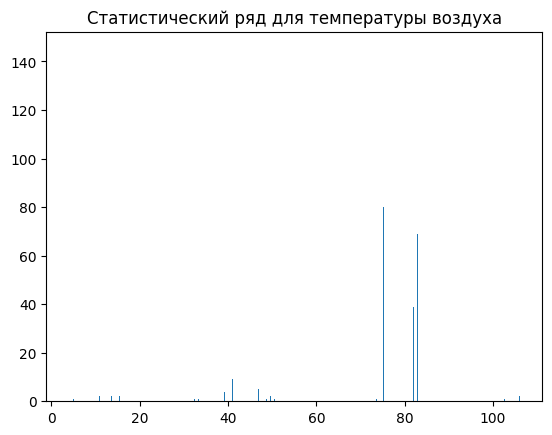

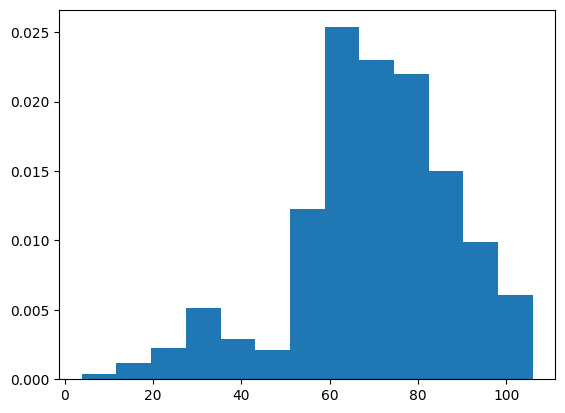

In [50]:
from collections import Counter

variation_range = list(data["Temperature(F)"])
variation_range.sort()
statistic_range = sorted(Counter(variation_range).items(), key=lambda a : a[0])
plt.hist(variation_range, bins=len(variation_range))
plt.title("Статистический ряд для температуры воздуха")
plt.show()
plt.hist(variation_range, bins=ind, density=True)
plt.show()

### 4. Определить 5 городов с наибольшим количеством автомобильных аварий за наблюдаемый период. Построить функции распределения случайных величин i - протяженность участка дороги, задействованного при аварии (Distance), в i-ом городе из данного списка, i = 1, 2, …, 5

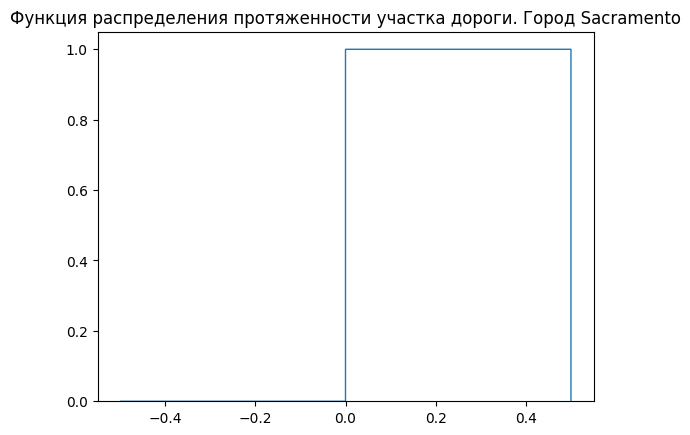

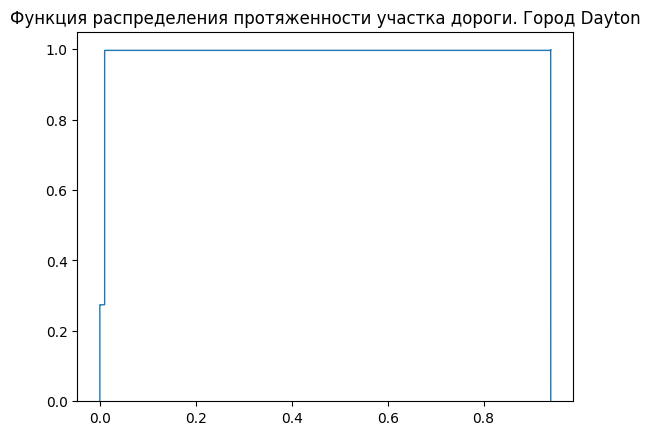

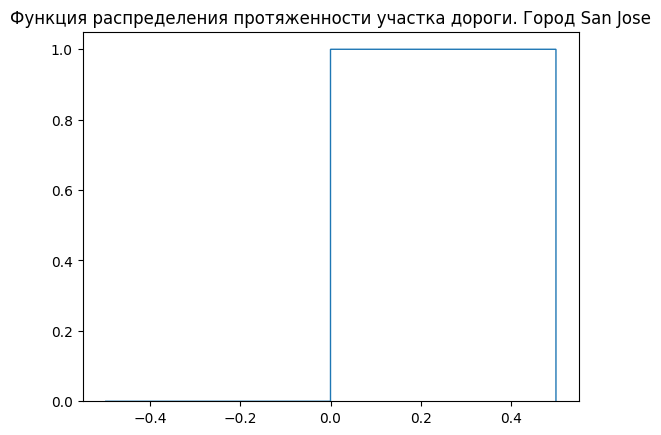

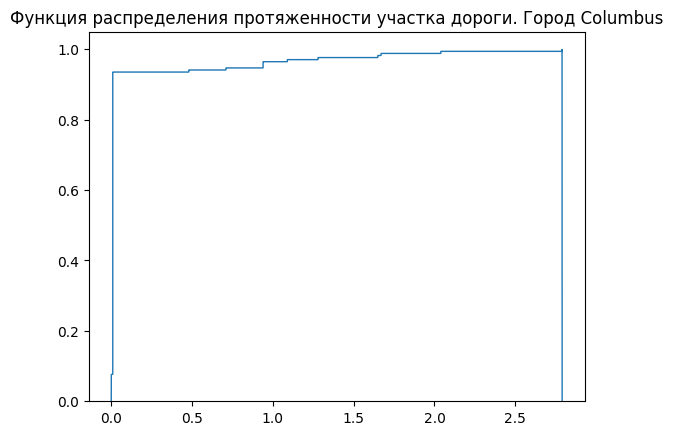

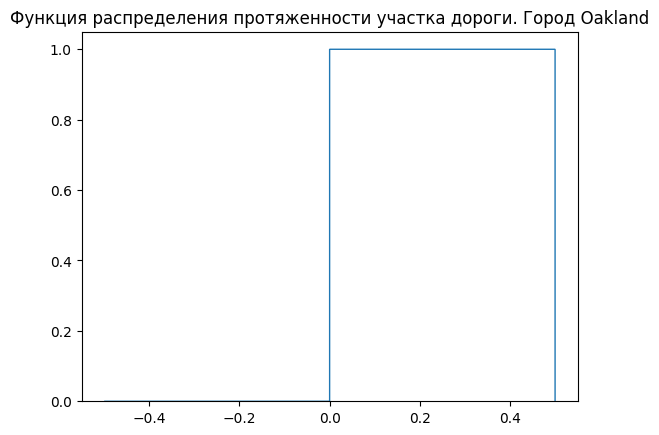

In [51]:
d = list(sorted(Counter(data["City"]).items(), key=lambda a : a[1], reverse=True))
cities = []
for item in d[:5]:
 cities.append(item[0])
for city in cities:
    plt.hist(data.loc[data["City"] == city]["Distance(mi)" ], bins=data.shape[0], cumulative=True, histtype='step', density=True)
    plt.title("Функция распределения протяженности участка дороги. Город "+ city)
    plt.show()